# Análise da população brasileira

Uma coisa importante na análise de dados é entender o contexto dos dados coletados, qual a realidade que eles estão inseridos. 

Por exemplo:
**Parece aceitável que mais da metade do congresso seja formada por homens brancos se esse grupo demográfico for mais da metade da população?** Nesse caso nós poderíamos pensar que existes mais indivíduos desse grupo na população e que por isso eles tem uma grande representatividade no congresso... Legal, vamos testar!

Vamos então tentar entender qual é o contexto das informações que vimos na análise anterior:
- Qual o perfil da população brasileira quanto a gênero, cor ou raça e situação do domicílio?
- Como esse perfil se comporta quando analisamos por estado?


Os dados aqui analisados são do censo de 2010, disponível pelo SIDRA [Sistema IBGE de Recuperação Automática](https://sidra.ibge.gov.br/home/pms/brasil) [Nessa tabela](https://sidra.ibge.gov.br/tabela/3175)

## Preparando os dados

In [271]:
%matplotlib inline

import io
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [272]:
url = 'https://raw.githubusercontent.com/pyladiespb-org/minicurso-analise-descritiva-dados-abertos/master/data/populacao/populacao_idade_agregada.csv'
dados_url = requests.get(url).content
populacao = pd.read_csv(io.StringIO(dados_url.decode('utf-8')), delimiter=';', header=2)
populacao

,Unidade da Federação,Sexo,Idade,Ano,Cor ou raça,Situação do domicílio,Unnamed: 6
0,Rondônia,Homens,0 a 4 anos,2010.0,Branca,Urbana,18720
1,Rondônia,Homens,0 a 4 anos,2010.0,Branca,Rural,6024
2,Rondônia,Homens,0 a 4 anos,2010.0,Preta,Urbana,1755
3,Rondônia,Homens,0 a 4 anos,2010.0,Preta,Rural,580
4,Rondônia,Homens,0 a 4 anos,2010.0,Amarela,Urbana,643
5,Rondônia,Homens,0 a 4 anos,2010.0,Amarela,Rural,162
6,Rondônia,Homens,0 a 4 anos,2010.0,Parda,Urbana,26827
7,Rondônia,Homens,0 a 4 anos,2010.0,Parda,Rural,9230
8,Rondônia,Homens,0 a 4 anos,2010.0,Indígena,Urbana,116
9,Rondônia,Homens,0 a 4 anos,2010.0,Indígena,Rural,793


In [273]:
populacao = populacao[:9072]
populacao

,Unidade da Federação,Sexo,Idade,Ano,Cor ou raça,Situação do domicílio,Unnamed: 6
0,Rondônia,Homens,0 a 4 anos,2010.0,Branca,Urbana,18720
1,Rondônia,Homens,0 a 4 anos,2010.0,Branca,Rural,6024
2,Rondônia,Homens,0 a 4 anos,2010.0,Preta,Urbana,1755
3,Rondônia,Homens,0 a 4 anos,2010.0,Preta,Rural,580
4,Rondônia,Homens,0 a 4 anos,2010.0,Amarela,Urbana,643
5,Rondônia,Homens,0 a 4 anos,2010.0,Amarela,Rural,162
6,Rondônia,Homens,0 a 4 anos,2010.0,Parda,Urbana,26827
7,Rondônia,Homens,0 a 4 anos,2010.0,Parda,Rural,9230
8,Rondônia,Homens,0 a 4 anos,2010.0,Indígena,Urbana,116
9,Rondônia,Homens,0 a 4 anos,2010.0,Indígena,Rural,793


In [274]:
populacao.columns

Index(['Unidade da Federação', 'Sexo', 'Idade', 'Ano', 'Cor ou raça',
       'Situação do domicílio', 'Unnamed: 6'],
      dtype='object')

In [275]:
populacao = populacao.rename(columns={'Unnamed: 6': "Quantidade", 
                                      'Unidade da Federação': "Estado"})
populacao.head()

,Estado,Sexo,Idade,Ano,Cor ou raça,Situação do domicílio,Quantidade
0,Rondônia,Homens,0 a 4 anos,2010.0,Branca,Urbana,18720
1,Rondônia,Homens,0 a 4 anos,2010.0,Branca,Rural,6024
2,Rondônia,Homens,0 a 4 anos,2010.0,Preta,Urbana,1755
3,Rondônia,Homens,0 a 4 anos,2010.0,Preta,Rural,580
4,Rondônia,Homens,0 a 4 anos,2010.0,Amarela,Urbana,643


Conteúdo sobre [Características Étnico-Raciais da População](https://biblioteca.ibge.gov.br/visualizacao/livros/liv63405.pdf) desenvolvido pelo IBGE.
Ainda sobre [indicadores sociais](https://www.ibge.gov.br/estatisticas-novoportal/sociais.html) existe uma página dedicada dentro do site do IBGE a dispor conteúdo sobre esse tema.

`populacao = populacao.replace(['Preta', 'Parda'], 'Negra')`

In [276]:
populacao = populacao.replace('-', 0)
populacao.head()

,Estado,Sexo,Idade,Ano,Cor ou raça,Situação do domicílio,Quantidade
0,Rondônia,Homens,0 a 4 anos,2010.0,Branca,Urbana,18720
1,Rondônia,Homens,0 a 4 anos,2010.0,Branca,Rural,6024
2,Rondônia,Homens,0 a 4 anos,2010.0,Preta,Urbana,1755
3,Rondônia,Homens,0 a 4 anos,2010.0,Preta,Rural,580
4,Rondônia,Homens,0 a 4 anos,2010.0,Amarela,Urbana,643


In [277]:
populacao.dtypes

Estado                    object
Sexo                      object
Idade                     object
Ano                      float64
Cor ou raça               object
Situação do domicílio     object
Quantidade                object
dtype: object

In [278]:
populacao['Quantidade'] = populacao['Quantidade'].astype(int)
populacao['Ano'] = populacao['Ano'].astype(object)
populacao.dtypes

Estado                   object
Sexo                     object
Idade                    object
Ano                      object
Cor ou raça              object
Situação do domicílio    object
Quantidade                int64
dtype: object

In [279]:
populacao.head()

,Estado,Sexo,Idade,Ano,Cor ou raça,Situação do domicílio,Quantidade
0,Rondônia,Homens,0 a 4 anos,2010,Branca,Urbana,18720
1,Rondônia,Homens,0 a 4 anos,2010,Branca,Rural,6024
2,Rondônia,Homens,0 a 4 anos,2010,Preta,Urbana,1755
3,Rondônia,Homens,0 a 4 anos,2010,Preta,Rural,580
4,Rondônia,Homens,0 a 4 anos,2010,Amarela,Urbana,643


## Agora que organizamos os dados, vamos brincar!

## 1. Qual o perfil da população brasileira quanto a gênero, idade e cor ou raça?

Agrupando por sexo

In [280]:
genero = populacao.groupby('Sexo').sum()
genero

,Quantidade
Sexo,
Homens,93406990
Mulheres,97348809


Colocando os valores em porcentagem

In [281]:
genero_porcentagem = genero['Quantidade']/sum(genero['Quantidade'])*100

genero_porcentagem = pd.DataFrame(genero_porcentagem)

genero_porcentagem.style.format({
    'Quantidade': '{:.2f}%'.format
})

,Quantidade
Sexo,
Homens,48.97%
Mulheres,51.03%


Verificar estilos disponíveis para os gráficos no matplotlib
É possível como eles se parecem [nesse link](https://matplotlib.org/devdocs/gallery/style_sheets/style_sheets_reference.html)


In [282]:
plt.style.available

['_classic_test',
 'seaborn-paper',
 'seaborn-ticks',
 'seaborn-bright',
 'seaborn-pastel',
 'fast',
 'seaborn-dark',
 'Solarize_Light2',
 'bmh',
 'grayscale',
 'seaborn-notebook',
 'seaborn-dark-palette',
 'seaborn-muted',
 'seaborn',
 'ggplot',
 'seaborn-talk',
 'seaborn-deep',
 'seaborn-colorblind',
 'dark_background',
 'classic',
 'seaborn-whitegrid',
 'seaborn-darkgrid',
 'fivethirtyeight',
 'seaborn-white',
 'seaborn-poster']

Selecionar um estilo

In [283]:
plt.style.use('fivethirtyeight')





Exemplos de [gráficos com matplotlib](https://matplotlib.org/devdocs/gallery/index.html)

Criando um gráfico com a distribuição por gênero

Text(0.5,1,'Distribuição da população por gênero')

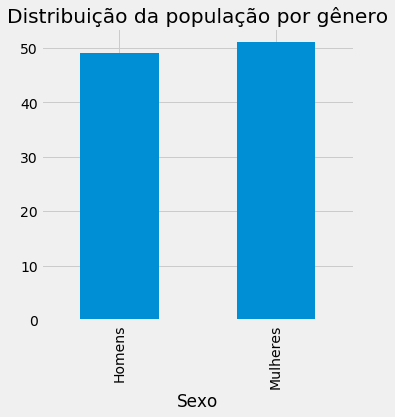

In [284]:
plt.rcParams['figure.figsize'] = (5, 5)
genero_porcentagem.plot(kind='bar', legend=None)
plt.title('Distribuição da população por gênero')

Agrupando por idade

In [285]:
idade = populacao.groupby('Idade').sum().sort_values('Quantidade', ascending=False)

idade = idade['Quantidade']/sum(idade['Quantidade'])*100

idade = pd.DataFrame(idade)

idade.style.format({
    'Quantidade': '{:.2f}%'.format
})

,Quantidade
Idade,
20 a 24 anos,9.04%
10 a 14 anos,9.00%
25 a 29 anos,8.97%
15 a 19 anos,8.91%
30 a 34 anos,8.25%
5 a 9 anos,7.85%
35 a 39 anos,7.28%
0 a 4 anos,7.23%
40 a 44 anos,6.82%


Agrupando por cor ou raça

In [286]:
cor_ou_raca = populacao.groupby('Cor ou raça').sum().sort_values('Quantidade', ascending=False)
cor_ou_raca

,Quantidade
Cor ou raça,
Branca,91051646
Parda,82277333
Preta,14517961
Amarela,2084288
Indígena,817963
Sem declaração,6608


In [287]:
cor_ou_raca_porcentagem = cor_ou_raca['Quantidade']/sum(cor_ou_raca['Quantidade'])*100
cor_ou_raca_porcentagem = pd.DataFrame(cor_ou_raca_porcentagem)
cor_ou_raca_porcentagem

,Quantidade
Cor ou raça,
Branca,47.732046
Parda,43.132284
Preta,7.610757
Amarela,1.092647
Indígena,0.428801
Sem declaração,0.003464


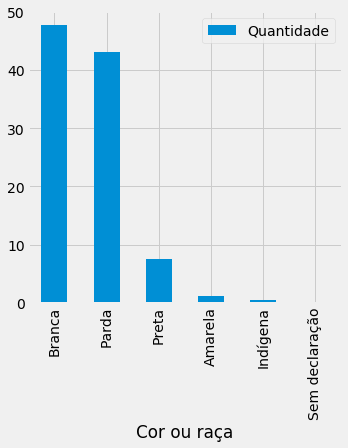

In [288]:
cor_ou_raca_porcentagem.plot(kind='bar')

In [289]:
sexo_cor_ou_raca = populacao.groupby(['Sexo', 'Cor ou raça']).sum().sort_values('Quantidade', ascending=False)
sexo_cor_ou_raca = pd.DataFrame(sexo_cor_ou_raca['Quantidade']/sum(sexo_cor_ou_raca['Quantidade'])*100)
sexo_cor_ou_raca

Quantidade
Sexo     Cor ou raça               
Mulheres Branca           24.848082
Homens   Branca           22.883964
Mulheres Parda            21.711250
Homens   Parda            21.421034
         Preta             3.945679
Mulheres Preta             3.665079
         Amarela           0.593892
Homens   Amarela           0.498755
         Indígena          0.214886
Mulheres Indígena          0.213915
Homens   Sem declaração    0.002472
Mulheres Sem declaração    0.000992

# 2. Como esse perfil se comporta quando analisamos por estado?

### Analisando características para o estado da Paraíba

In [290]:
por_estado = populacao.loc[populacao['Estado']=='Paraíba'].\
                groupby(['Estado', 'Cor ou raça', 'Sexo']).sum().\
                sort_values('Quantidade', ascending=False)
        
por_estado = pd.DataFrame(por_estado['Quantidade']/sum(por_estado['Quantidade'])*100)

por_estado

Quantidade
Estado  Cor ou raça    Sexo                
Paraíba Parda          Mulheres   26.895751
                       Homens     25.848288
        Branca         Mulheres   20.980542
                       Homens     18.824100
        Preta          Homens      2.965569
                       Mulheres    2.688657
        Amarela        Mulheres    0.743231
                       Homens      0.544082
        Indígena       Mulheres    0.254478
                       Homens      0.253921
        Sem declaração Mulheres    0.000717
                       Homens      0.000664

### Analisando características para o estado da Bahia

In [291]:
por_estado = populacao.loc[populacao['Estado']=='Bahia'].\
                groupby(['Estado', 'Cor ou raça', 'Sexo']).sum().\
                sort_values('Quantidade', ascending=False)
        
por_estado = pd.DataFrame(por_estado['Quantidade']/sum(por_estado['Quantidade'])*100)

por_estado

Quantidade
Estado Cor ou raça    Sexo                
Bahia  Parda          Mulheres   30.125885
                      Homens     29.038791
       Branca         Mulheres   11.515387
                      Homens     10.676422
       Preta          Homens      8.649962
                      Mulheres    8.452593
       Amarela        Mulheres    0.628798
                      Homens      0.505012
       Indígena       Mulheres    0.204089
                      Homens      0.198146
       Sem declaração Homens      0.002882
                      Mulheres    0.002033